In [1]:
import pandas as pd
import datetime as dt

In [99]:
import numpy as np

In [2]:
import datetime as dt

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
pd.set_option('display.max_columns', None)

In [59]:
position_history = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/position_history_new_starts_at_01.07.2018.tsv', delimiter='\t')
items = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/items.tsv', delimiter='\t', engine='python')
items_history = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/itemshistory.tsv', delimiter='\t', engine='python')
areas = pd.read_csv('../data/raw/TRUMPF_Indoor_Logistik_Dataset/areas.tsv', delimiter='\t', engine='python')

In [60]:
position_history.head()

,id,address,x,y,z,timestamp
0,5364352,-359037136983245745,9.85794,-0.549547,1.852340,1530403279184
1,5364354,-359037136983245745,9.78791,-0.549547,1.846210,1530403280444
2,5364356,-359037136983245745,9.69488,-0.549547,1.846210,1530403281720
3,5364358,4751451578702838656,9.76520,-0.279698,1.446820,1530403284146
4,5364359,-145401774635637016,9.24891,-0.606032,0.984861,1530403284181


In [61]:
position_history.timestamp = position_history.timestamp.apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime("%y.%m.%d;%H:%M:%S%z"))
position_history.timestamp = pd.to_datetime(position_history.timestamp, format="%y.%m.%d;%H:%M:%S")

In [62]:
position_history.address = position_history.address.abs()

In [63]:
position_history.y = -1*position_history.y

In [64]:
position_history.head()

,id,address,x,y,z,timestamp
0,5364352,359037136983245745,9.85794,0.549547,1.852340,2018-07-01 02:01:19
1,5364354,359037136983245745,9.78791,0.549547,1.846210,2018-07-01 02:01:20
2,5364356,359037136983245745,9.69488,0.549547,1.846210,2018-07-01 02:01:21
3,5364358,4751451578702838656,9.76520,0.279698,1.446820,2018-07-01 02:01:24
4,5364359,145401774635637016,9.24891,0.606032,0.984861,2018-07-01 02:01:24


In [65]:
position_history.address.nunique()

178

In [67]:
def plot_path(df, address=359037136983245745):
    temp = df[df.address == address]
    plt.plot(temp.x, temp.y)
    plt.show()

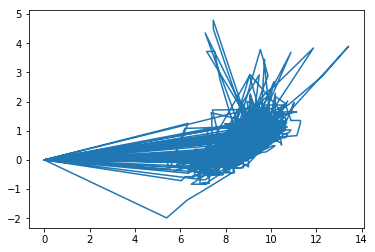

In [68]:
plot_path(position_history, 5366760100698372614)

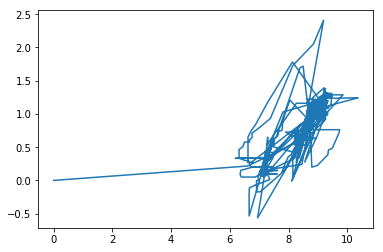

In [69]:
plot_path(position_history, 2640464410326278600)

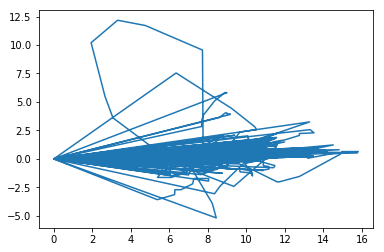

In [70]:
plot_path(position_history, 2717588136409346402)

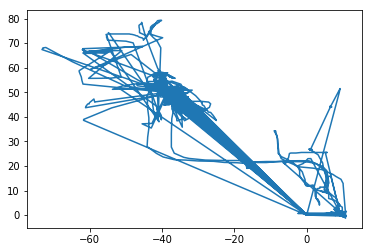

In [71]:
plot_path(position_history, 914845595629141593)

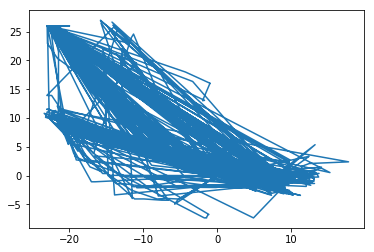

In [72]:
plot_path(position_history, 2804976878920750165)

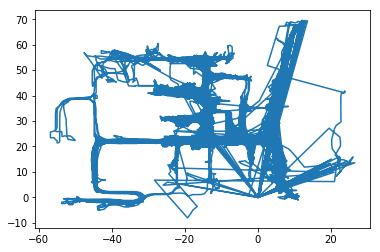

In [73]:
plot_path(position_history, address=359037136983245745)

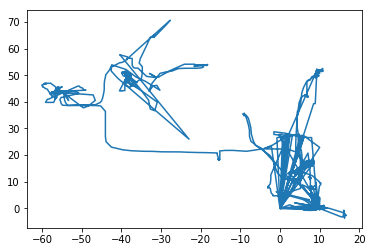

In [74]:
plot_path(position_history, 145401774635637016)

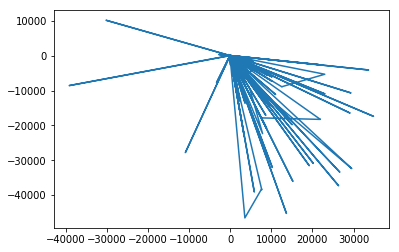

In [75]:
plot_path(position_history, 4751451578702838656)

In [49]:
len(position_history.x[(position_history.x < -62.5) | (position_history.x > 53.6)])

14770

In [51]:
len(position_history.x[(position_history.x < -62.5) | (position_history.x > 53.6) | (position_history.y > 67.5) | (position_history.y < -14.325)])

20666

In [41]:
len(position_history.y[(position_history.y < -67.5) | (position_history.y > 14.325)])

20432

In [47]:
position_history.y = -1*position_history.y

In [48]:
len(position_history.y[(position_history.y > 67.5) | (position_history.y < -14.325)])

20432

# Important Areas

KeyboardInterrupt: 

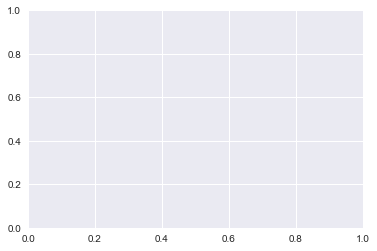

In [185]:
sb.kdeplot(position_history.x, position_history.y, shade=True)

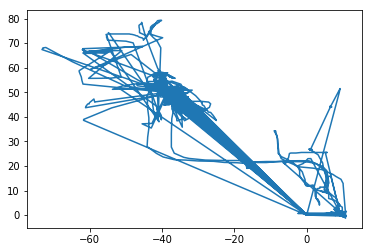

In [71]:
plot_path(position_history, 914845595629141593)

In [106]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

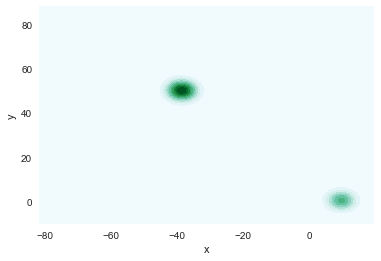

In [181]:
X = df.loc[df.address == 914845595629141593, ['x', 'y']]
sb.kdeplot(X.x, X.y, shade=True)

In [131]:
X.head()

,x,y
1061,-38.218,50.1854
1062,-38.218,50.1541
1063,-38.218,50.1306
1064,-38.218,50.1277
1067,-38.218,50.1223


In [132]:
scaled = StandardScaler().fit_transform(X)

In [133]:
len(X)

47800

In [156]:
db = DBSCAN(eps=0.3, min_samples=10).fit(scaled)

In [157]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [158]:
#labelled = pd.DataFrame(X, columns=['x', 'y'])

In [159]:
X['cluster'] = labels

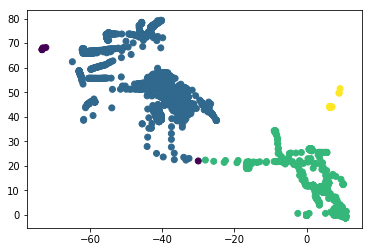

In [160]:
plt.scatter(X.x, X.y, c=X.cluster)

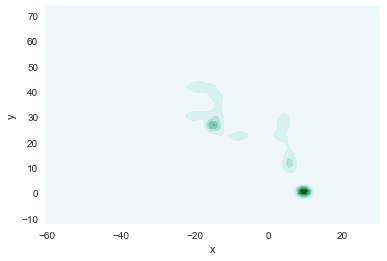

In [182]:
X = df.loc[df.address == 359037136983245745, ['x', 'y']]
sb.kdeplot(X.x, X.y, shade=True)

In [165]:
def plot_cluster(df, address=359037136983245745):
    temp = df.loc[df.address == address, ['x', 'y']]
    scaled = StandardScaler().fit_transform(temp)
    db = DBSCAN(eps=0.3, min_samples=10).fit(scaled)
    #temp['cluster'] = db.labels_
    plt.scatter(temp.x, temp.y, c=db.labels_)

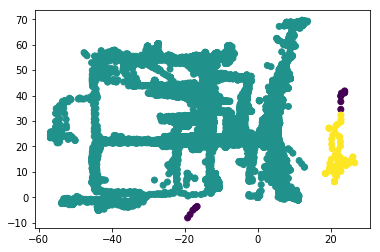

In [166]:
plot_cluster(position_history)

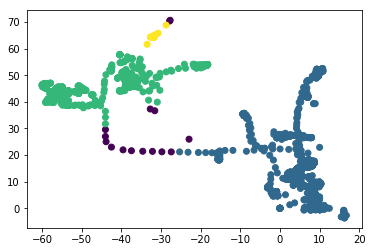

In [167]:
plot_cluster(position_history, address=145401774635637016)

# Items

In [76]:
items.head()

,itemId,timestamp,address,parentItemId
0,NaN,1539593961630,-2571823634721508813,NaN
1,9247526,1539187090636,-1848788721524220278,-1
2,F7108688,1529477127141,-1,NaN
3,F7134239,1528538612844,-6373291646473613089,-1
4,F7154996,1529477143136,-1,NaN


In [170]:
items.address.value_counts()

-1                      30
-1743798228505193158     5
 5106149975160207938     5
 6629077505579689371     4
-1848788721524220278     4
 9096423301671818677     3
-8608182124092177080     3
-2571823634721508813     3
 897836185907794843      3
 5584577939061494859     3
-5655706921459459053     3
-378114927423601818      3
 1986543873053567483     3
 2070991107496355897     3
 3622430746677702478     3
-6196490120761152012     3
 4646720082062120060     3
 8375791865885302222     3
 4591818761713987449     3
 3407280054864427282     2
 8240429773739531826     2
-3170424921640195624     2
 8721004544596209723     2
-3939564973941109987     2
-1686734335080013094     2
 2600212495939589915     2
-6073876375101542463     2
-6975491984682628175     2
 5491168338925147774     2
-5838424063914740714     2
                        ..
 1405451950033454729     1
-2292084713005523594     1
-2956353988975089002     1
-7573228149069718550     1
 4923569006891484176     1
 1384569051694241367     1
-

In [77]:
items_history.head()

,id,itemId,timestamp,address,parentItemId
0,1,test,1519313607051,-1,-1
1,2,Kunde A,1520869772375,-1,test
2,3,F7487232,1528241748174,1986543873053567483,-1
3,4,F7512377,1528253447539,-4770966441840271855,-1
4,5,F7418156,1528272810868,2600212495939589915,-1


In [78]:
items.shape

(171, 4)

In [79]:
items_history.shape

(296, 5)

In [81]:
a = set(items.itemId.unique())

In [82]:
b = set(items_history.itemId.unique())

In [83]:
len(a), len(b)

(171, 171)

In [84]:
len(a-b)

0

In [85]:
len(b-a)

0

In [86]:
len(a.intersection(b))

171